Część 1

Wartości odstające to wartości, które różnią się znacząco od większości danych w zbiorze. Mogą one wpłynąć na analizę danych, szczególnie na statystyki opisowe, takie jak średnia czy mediana. 

Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. populacji,

1.5. PKB,

1.6. 4 innych różnych informacji, które uznasz za istotne.

Zaimportowanie danych

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')



Wykres dla nowych zachorowań, śmierci oraz szczepień

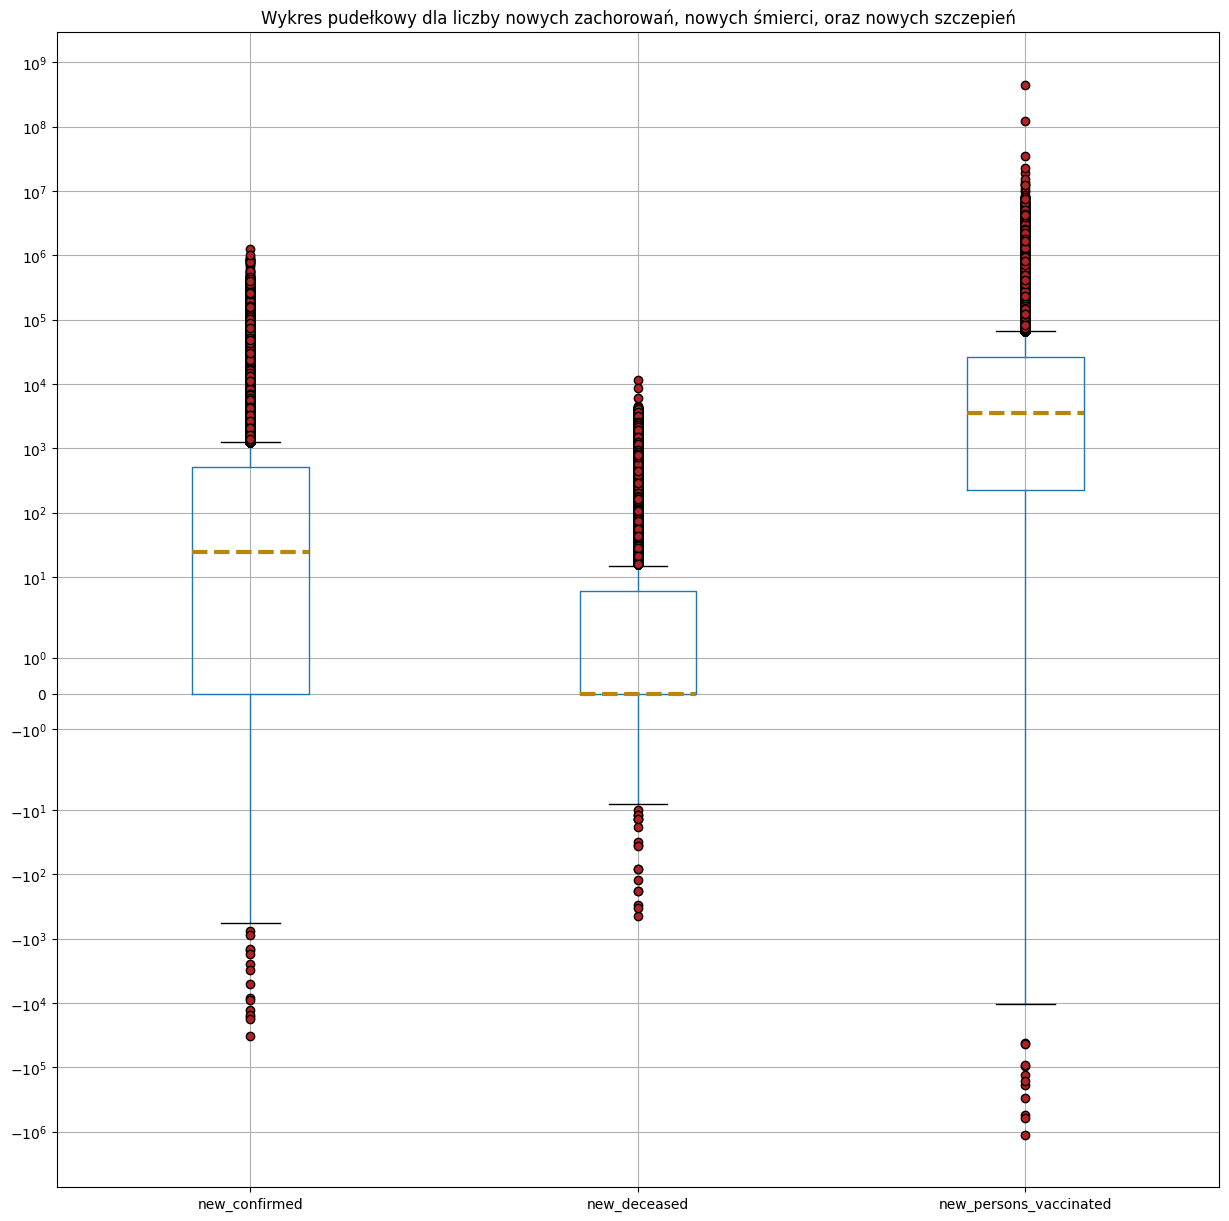

In [44]:
merged_covid_df.boxplot(["new_confirmed", "new_deceased", "new_persons_vaccinated"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

Wykres dla populacji oraz GDB

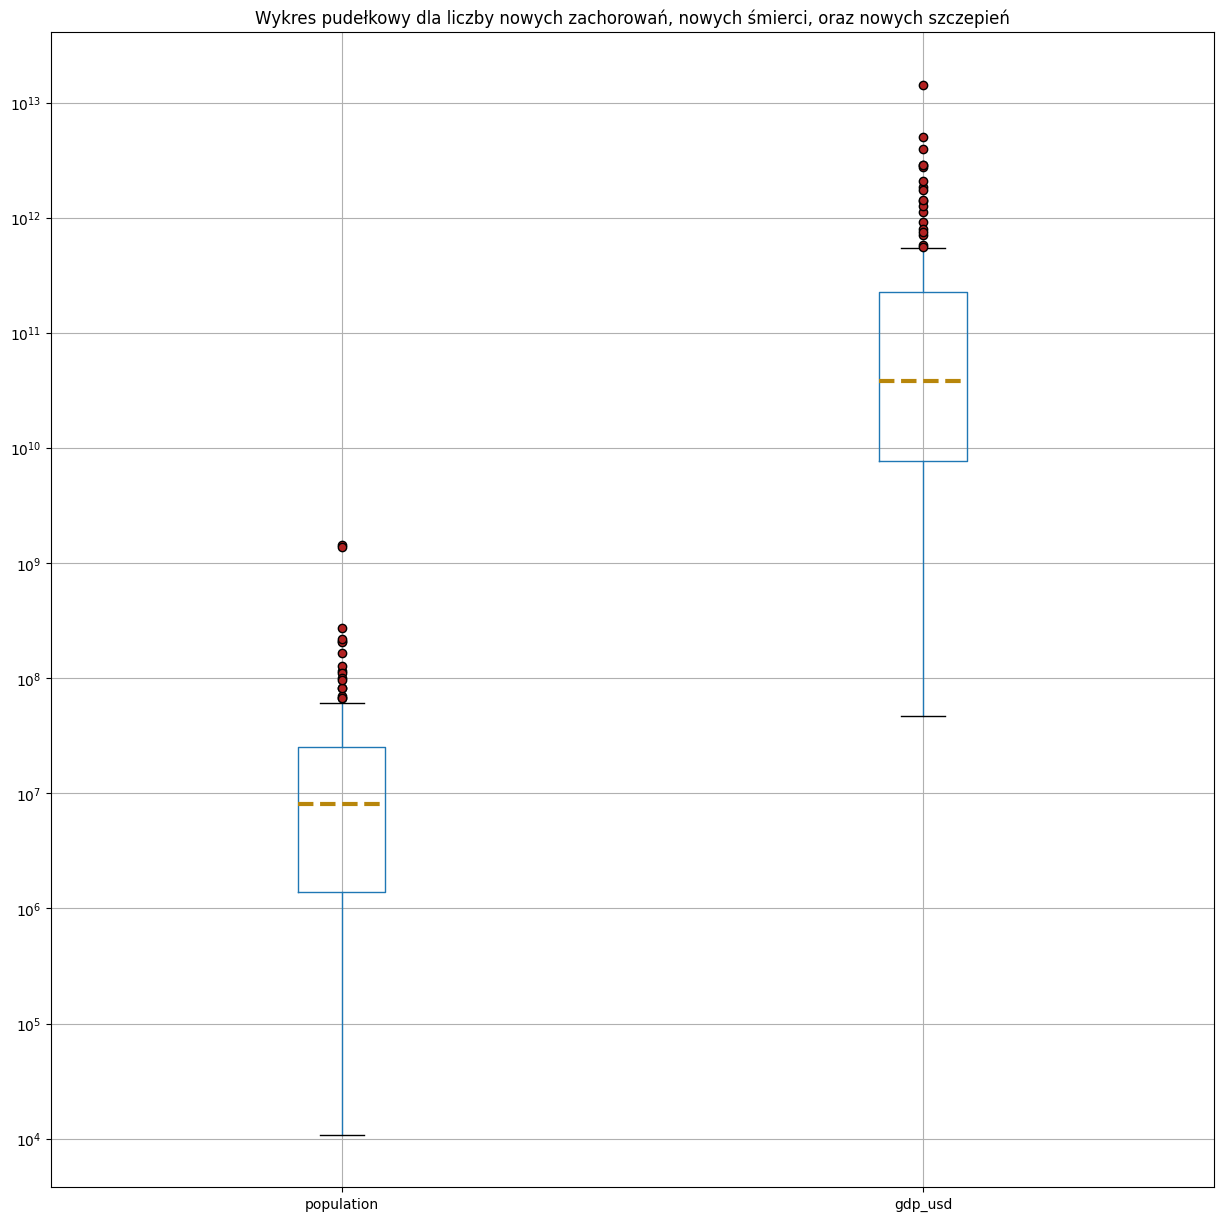

In [45]:
merged_country_df = pd.read_csv('wyniki\\merged_6_2.csv')

merged_country_df.boxplot(["population", "gdp_usd"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

1.6 4 inne informacje


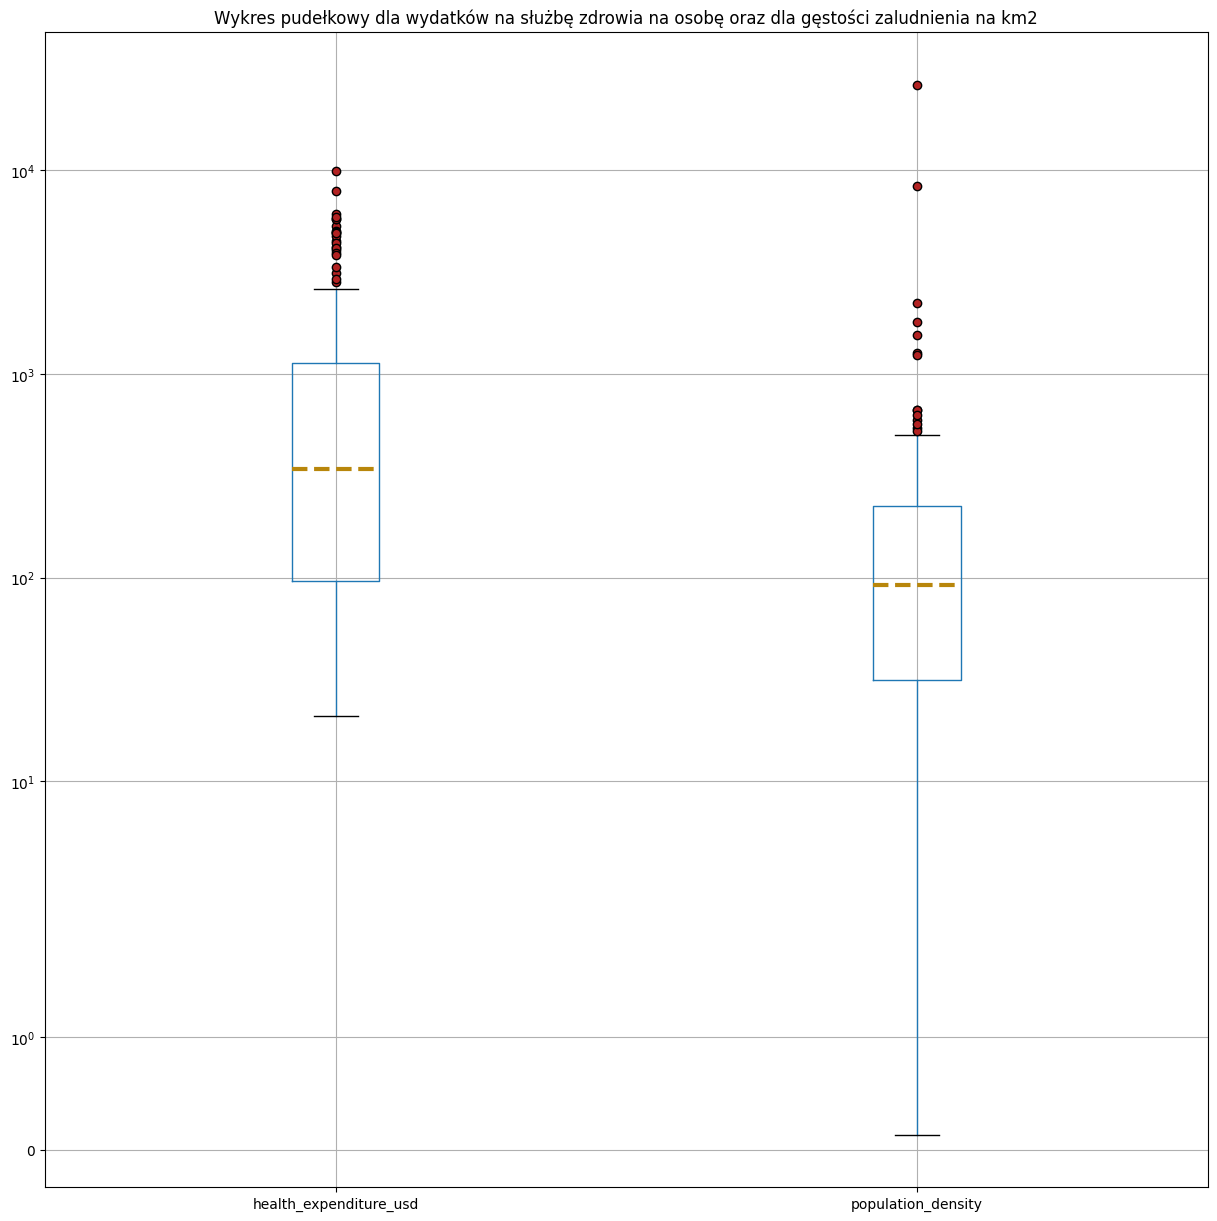

In [46]:

merged_country_df.boxplot(["health_expenditure_usd", "population_density"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla wydatków na służbę zdrowia na osobę oraz dla gęstości zaludnienia na km2')
plt.show()

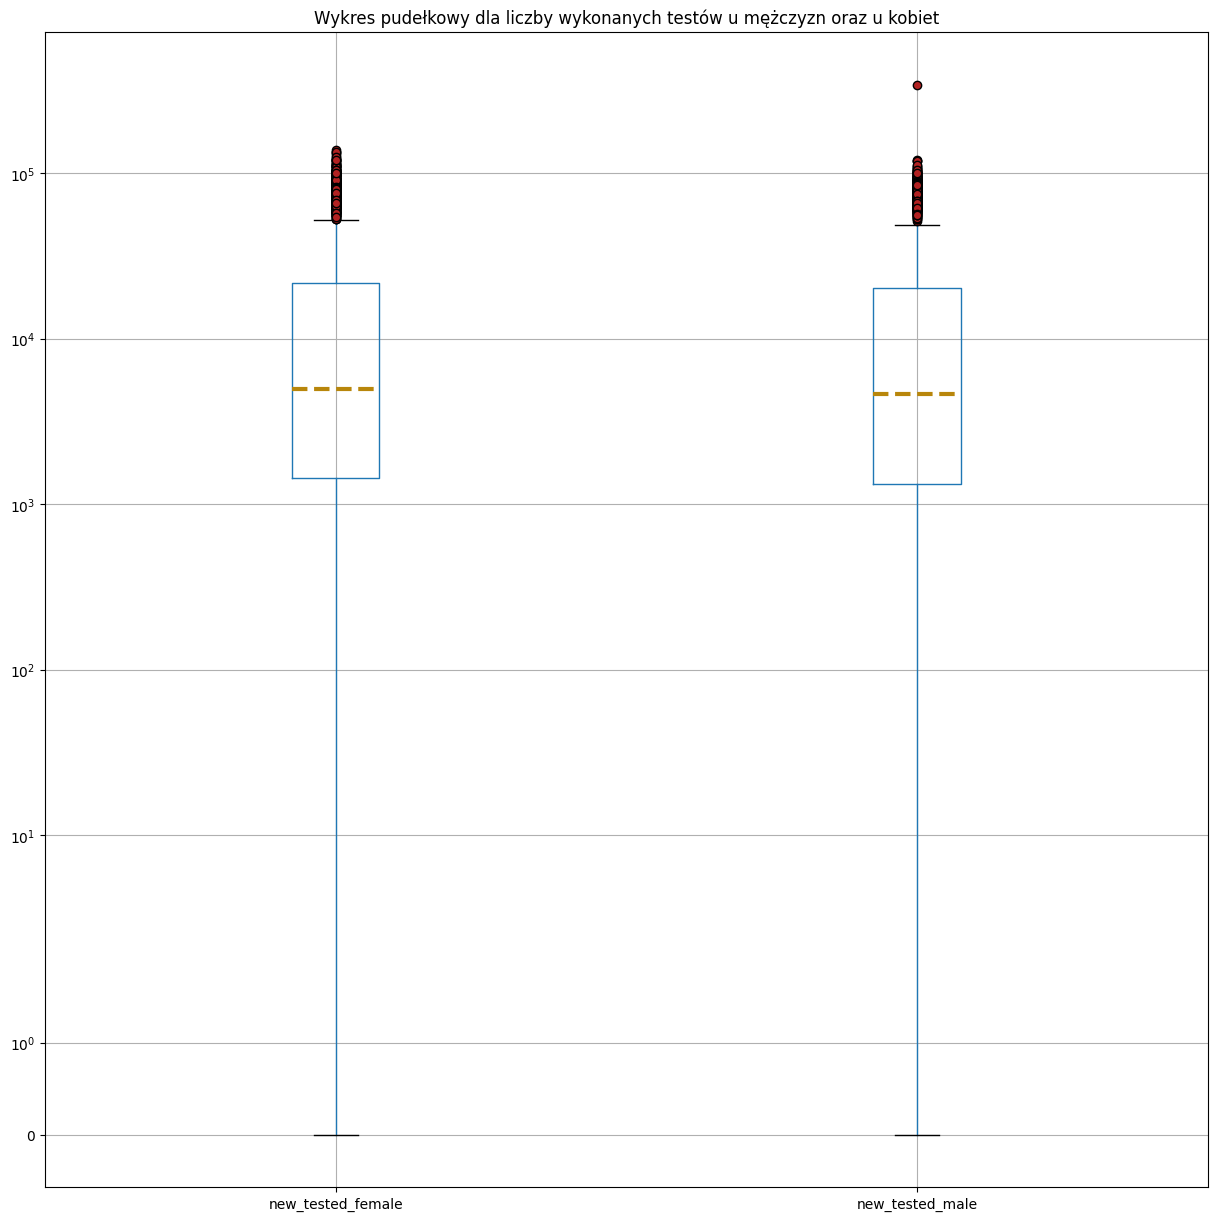

In [48]:
merged_covid_df.boxplot(["new_tested_female", "new_tested_male"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby wykonanych testów u mężczyzn oraz u kobiet')
plt.show()

Część 3

Obliczenia statystyczne (m.in. średnia, mediana, moda, odchylenie standardowe) pozwolają na zrozumienie rozkładu danych oraz na identyfikację ewentualnych anomalii lub nietypowych wartości. 

Wykonaj następujące obliczenia:


3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

3.6. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.
Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

Przygotowanie danych

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


countries = ['Poland', 'Czech Republic', 'Germany', 'France', 'United Kingdom', 'Japan', 'Canada', 'Italy', 'Belgium', 'Denmark']


merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])
df_filtered = merged_covid_df[(merged_covid_df['date'].dt.year == 2021) & (merged_covid_df['date'].dt.month == 10) & (merged_covid_df['country_name'].isin(countries))]


3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


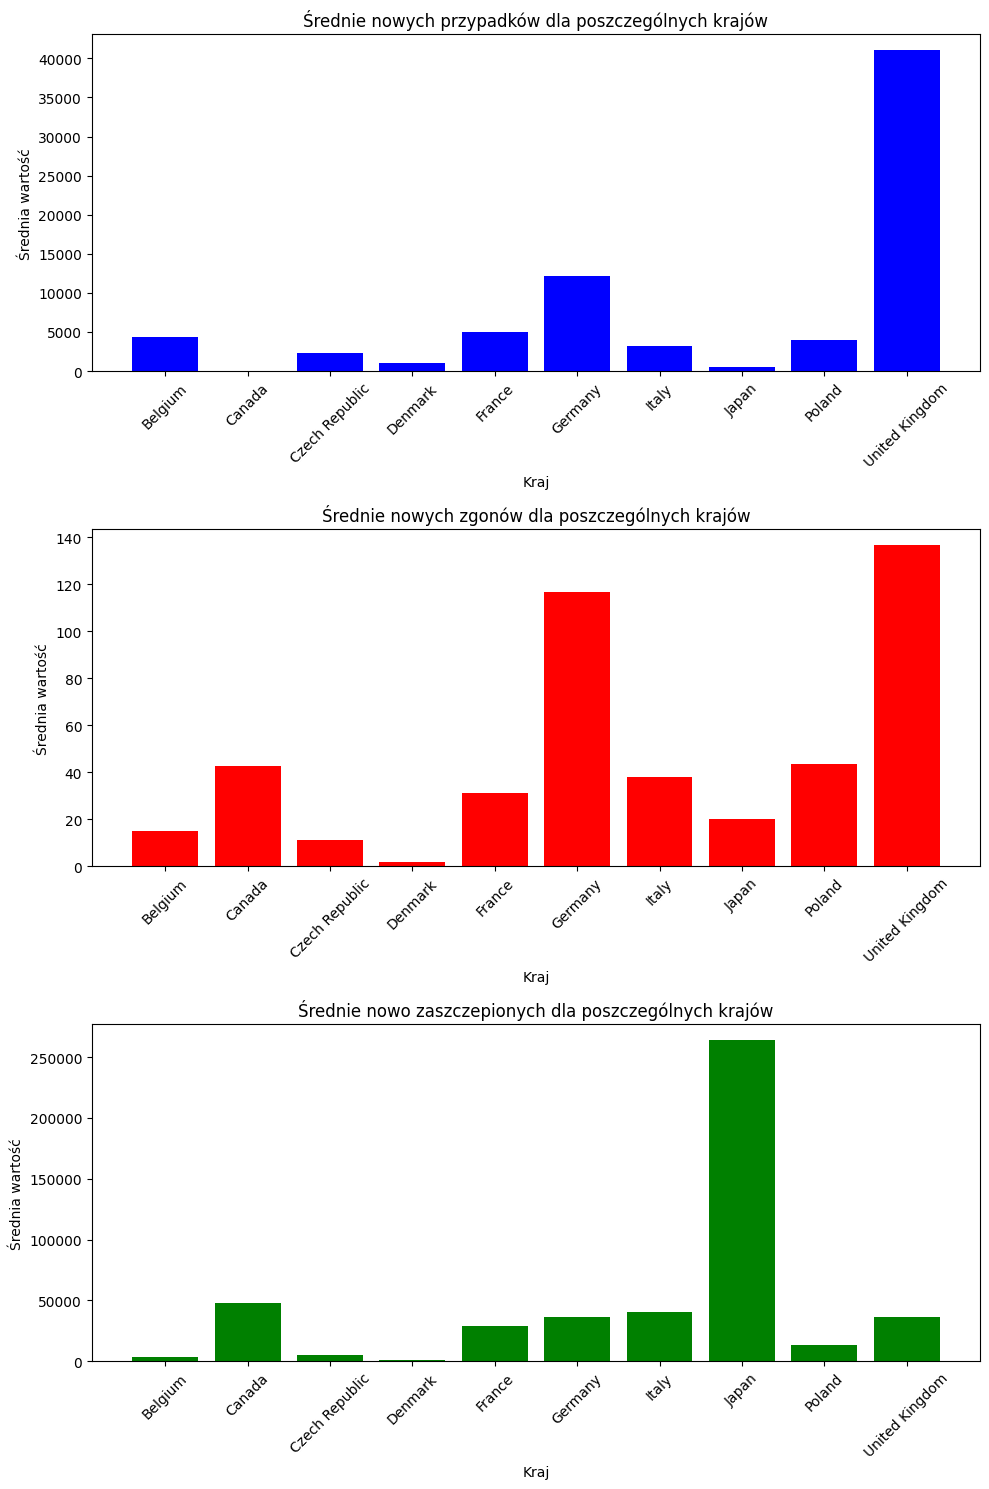

In [105]:
avg_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_deceased': 'mean', 'new_persons_vaccinated': 'mean'})
avg_values.reset_index(inplace=True)

index = np.arange(len(avg_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, avg_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Średnie nowych przypadków dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Średnia wartość')
ax[0].set_xticks(index)
ax[0].set_xticklabels(avg_values['country_name'], rotation=45)

ax[1].bar(index, avg_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Średnie nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Średnia wartość')
ax[1].set_xticks(index)
ax[1].set_xticklabels(avg_values['country_name'], rotation=45)

ax[2].bar(index, avg_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Średnie nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Średnia wartość')
ax[2].set_xticks(index)
ax[2].set_xticklabels(avg_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


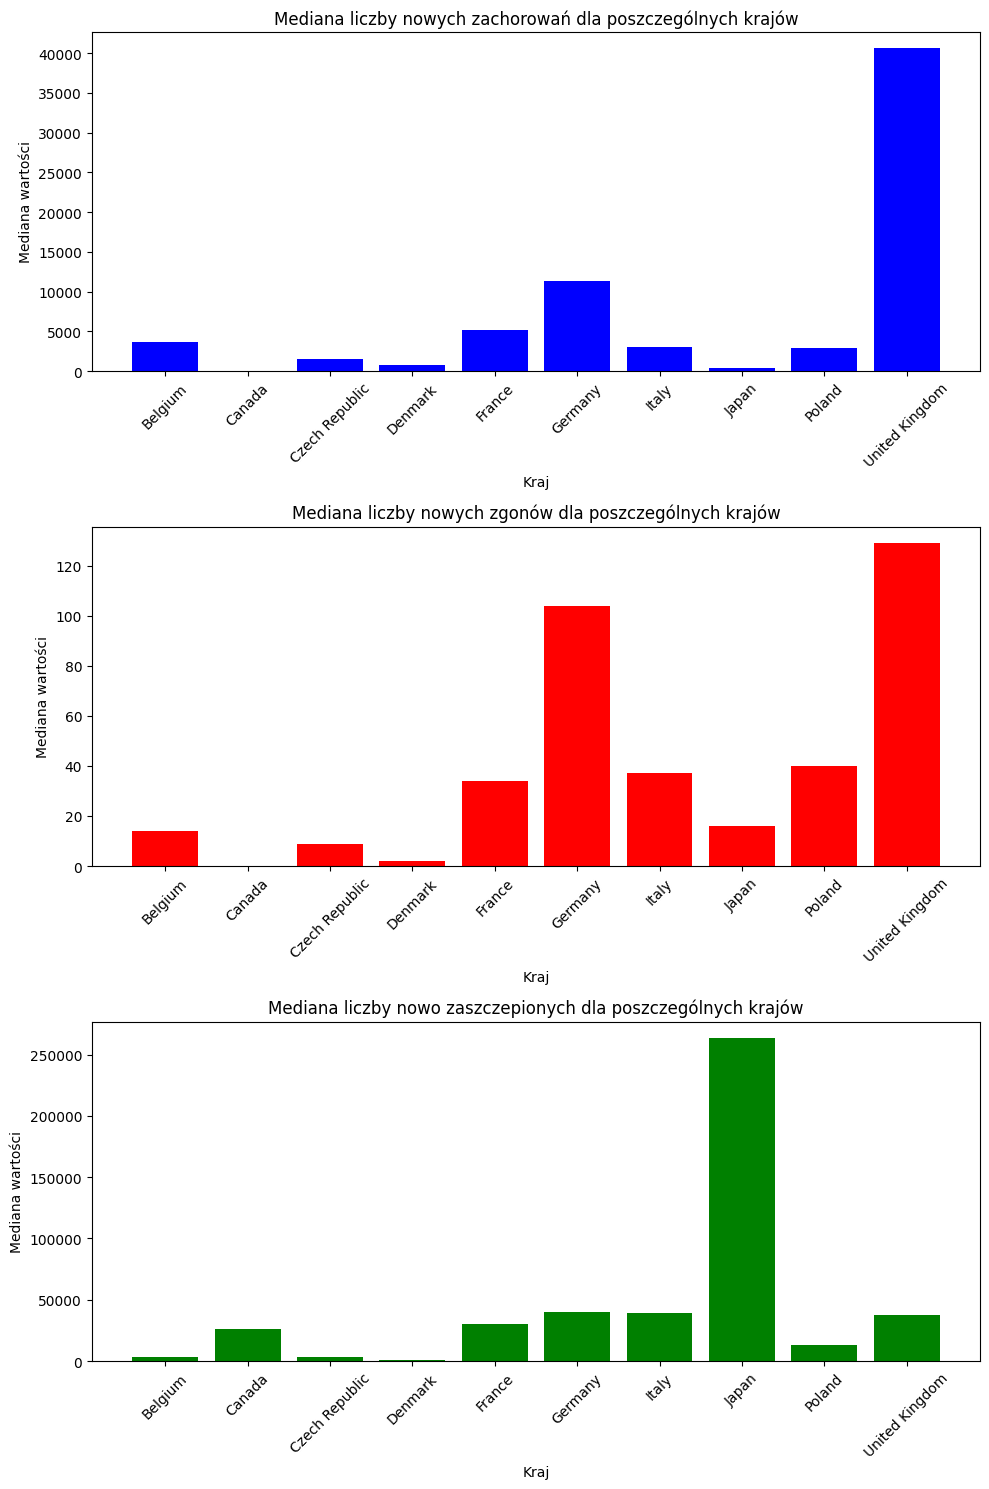

In [107]:
median_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'median', 'new_deceased': 'median', 'new_persons_vaccinated': 'median'})
median_values.reset_index(inplace=True)

index = np.arange(len(median_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, median_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Mediana liczby nowych zachorowań dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Mediana wartości')
ax[0].set_xticks(index)
ax[0].set_xticklabels(median_values['country_name'], rotation=45)

ax[1].bar(index, median_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Mediana liczby nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Mediana wartości')
ax[1].set_xticks(index)
ax[1].set_xticklabels(median_values['country_name'], rotation=45)

ax[2].bar(index, median_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Mediana liczby nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Mediana wartości')
ax[2].set_xticks(index)
ax[2].set_xticklabels(median_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


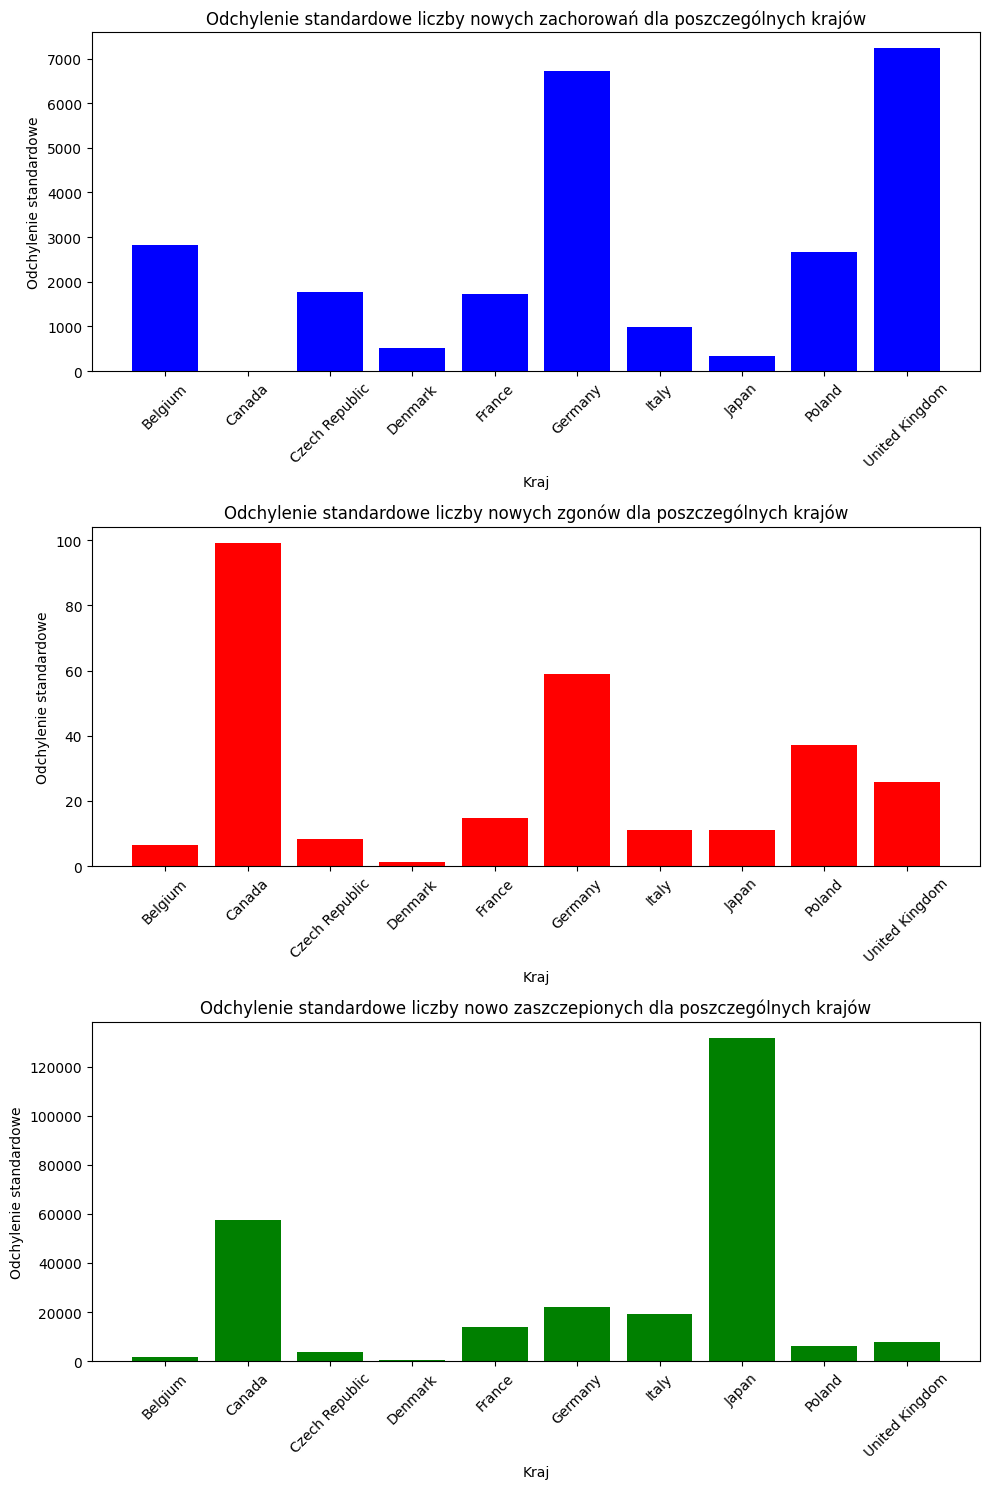

In [108]:
std_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'std', 'new_deceased': 'std', 'new_persons_vaccinated': 'std'})
std_values.reset_index(inplace=True)

index = np.arange(len(std_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, std_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Odchylenie standardowe liczby nowych zachorowań dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Odchylenie standardowe')
ax[0].set_xticks(index)
ax[0].set_xticklabels(std_values['country_name'], rotation=45)

ax[1].bar(index, std_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Odchylenie standardowe liczby nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Odchylenie standardowe')
ax[1].set_xticks(index)
ax[1].set_xticklabels(std_values['country_name'], rotation=45)

ax[2].bar(index, std_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Odchylenie standardowe liczby nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Odchylenie standardowe')
ax[2].set_xticks(index)
ax[2].set_xticklabels(std_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
Przygotowanie danych dla 3.5 oraz 3.6